## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C   or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('F:\Data_Science\Statistic\statistics project 1\data/human_body_temperature.csv')

## Is the distribution of body temperatures normal?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 

In [3]:
import numpy as np
import scipy.stats as stats
import pylab as pl
%matplotlib inline
import math as mt

(array([ 0.06837607,  0.1025641 ,  0.25641026,  0.44444444,  0.51282051,
         0.51282051,  0.25641026,  0.01709402,  0.03418803,  0.01709402]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

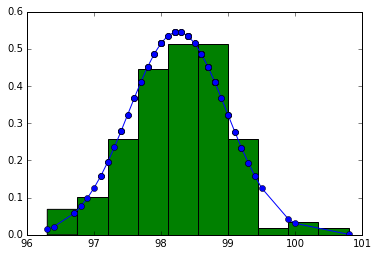

In [4]:
h=sorted(df.temperature)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')
pl.hist(h,normed=True)

## Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different`

### Null Hypothesis, H0=Poplation mean is really 98.6 degrees F.
###H1= Poplation mean is not 98.6 degrees F.

Assume H0 is true.
And number of sample is 130, we can assume that samples will have normal distribution. 

### Getting Standard Deviation of the sample

In [5]:
import statistics
sigma1=statistics.pstdev(h)

### Standard Deviation of sample distribution=Standard deviation of the population/sqrt(n)
As we dont know the values of Standard deviation of the population, our best estimate for the this value would be the Standard Deviation of the sample(sigma1)

In [6]:
sigma1

0.730357778905038

In [7]:
sigma=sigma1/(mt.sqrt(len(h)))

In [8]:
sigma

0.06405661469519337

### Getting the mean of the given Sample 

In [9]:
mean1=np.mean(h)

In [10]:
mean1

98.249230769230778

### Getting the distance between sample mean and 98.6 

In [11]:
dist=(98.6-mean1)/sigma

In [12]:
dist

5.4759252020781153

### 98.6 is 5.48 standard deviation away from the mean.
# So true poulation mean is NOT 98.6 degrees F

### Getting the probabilty of getting body temperature as 98.6 from sample mean

In [13]:
import scipy.stats as st
st.norm.cdf(dist)

0.99999997823842413

### There is 99.99% chance the the sample mean is between actual population mean and  98.6

### At what temperature should we consider someone's temperature to be "abnormal"?
### Start by computing the margin of error and confidence interval. 

#### We will assume that temperature with in 95% of the actual population mean is the normal temperature.
#### 95% probability will be 2 times of Standard Deviation of sample distribution

In [14]:
2*sigma

0.12811322939038675

#### Confidence interval would be mean1-(2*sigma) and mean2+(2*sigma) 
### Mar

In [15]:
#Lower limit of confidence interval
mean1-(2*sigma)

98.121117539840384

In [16]:
#Upper limit of confidence interval
mean1+(2*sigma)

98.377343998621171

In [17]:
2*sigma

0.12811322939038675

### Margin of error would be 12% 

### Is there a significant difference between males and females in normal temperature?
### Set up and solve for a two sample hypothesis testing. 

## H0= Hyposthesis that there is not difference between male and female temperature 
## H1= Hyposthesis that there is difference between male and female temperature 
## Lets assume that H0 is true.

#### Creating two dataframe having male and female temperature 

In [18]:
temp_m=df[df.gender=='M']
temp_f=df[df.gender=='F']

#### Creating the series for male and female temperature 

In [19]:
male_t=temp_m.temperature
female_t=temp_f.temperature

#### Getting the sample mean for male and female temperature 

In [20]:
male_mean=np.mean(male_t)
female_mean=np.mean(female_t)

#### Getting standard deviation for the sample of male and female temerature 

In [21]:
sigma_male=statistics.pstdev(male_t)
sigma_female=statistics.pstdev(female_t)

#### Getting the standard deviation for the sampling distribution 

In [22]:
std_dev_sample_male=sigma_male/(mt.sqrt(len(male_t)))
std_dev_sample_female=sigma_female/(mt.sqrt(len(female_t)))

#### Difference between sample mean of male and female. 

In [36]:
mean_diff=female_mean-male_mean
mean_diff

0.289230769230727

#### Standard deviation for the distribution for male and female temperature difference.  

In [37]:
stdev_diff=std_dev_sample_male+std_dev_sample_female
stdev_diff

0.17750689416097937

#### Getting the distance of mean_diff from the mean. Here as we have assume H0 mean would be 0 

In [38]:
(mean_diff-0)/stdev_diff

1.6294058357441952

#### Assuming H0 is true, getting the probabilty of getting the temperature differenc as mean_diff  

In [40]:
(1-st.norm.cdf(mean_diff/stdev_diff))*100

5.1613567108243164

## So there is only 5% probability of getting male and female temperature difference as mean_diff, which is reletively less. So our NULL hypothesis is not correct. 
## So there would be significance diffeence between male and female temperature